<a href="https://colab.research.google.com/github/longbui23/Amazon-Sentiment-Analysis/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **AMAZON SENTIMENT ANALYSIS ON PHONE PAYMENTS: SENTIMENT ANALYSIS**

  <a id="top"></a>
    <div class="list-group" id="list-tab" role="tablist">
    <h1 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">Table of Content</h1>
        
* [1. Dataset and Libraries](#1)
  - [a. Import Libraries and Dataset](#1a)
* [2. Sentiment Analysis](#2)
  - [a. Data Wrangling](#2a)
  - [b. Emotion Analysis](#2b)
  - [a. Text2Emotion](#2c)

<a id="1"></a>
<font color="blue" size=+2.5><b>1. Datasets and Libraries</b></font>

<a id="1a"></a>
<font color="black" size=+1.5><b>a. Import Dataset and Library</b></font>

In [1]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis

Mounted at /content/drive
/content/drive/My Drive/ECON314: Amazon-Sentiment-Analysis


In [2]:
#import libraries and packages
#!pip install nltk
#!pip uninstall emoji
!pip install emoji==1.7.0
!pip install text2emotion

import numpy as np
import pandas as pd

from textblob import TextBlob
import emoji
import text2emotion as te

import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.4/175.4 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-1.7.0-py3-none-any.whl size=171034 sha256=5aff9d0696de442bf6b28cbed670ec3cacfa4b88350d820250399966d3ad3035
  Stored in directory: /root/.cache/pip/wheels/31/8a/8c/315c9e5d7773f74b33d5ed33f075b49c6eaeb7cedbb86e2cf8
Successfully built emoji
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 kB 2.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [3]:
#import data
df = pd.read_csv("Data/clean_data.csv")
df.reset_index(inplace=True)
df.rename(columns={'index':'reviewID'}, inplace=True)
df.head()

,reviewID,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,374.0
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,214.0
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,12.0
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,76.0
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,223.0


<a id="2"></a>
<font color="blue" size=+2.5><b>2. Sentimental Analysis</b></font>

<a id="2a"></a>
<font color="black" size=+1.5><b>a.Data Wrangling</b></font>

<Axes: >

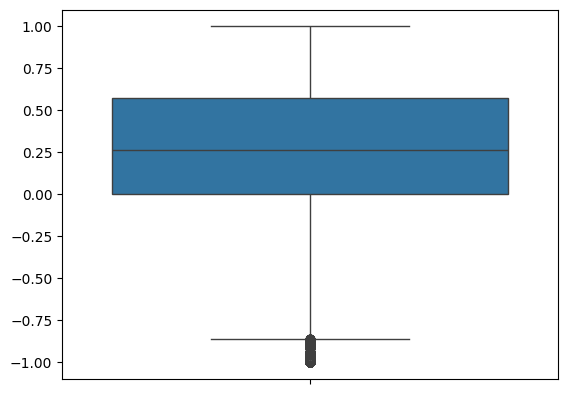

In [4]:
#initiate score vars
score = []
for comment in df['Reviews']:
  blob = TextBlob(comment)
  polarity = blob.sentiment.polarity
  score.append(polarity)

#display
sns.boxplot(score)

In [5]:
df['sentimentScore'] = score

In [8]:
sentimentCategory = []
for eachScore in df['sentimentScore']:
  if eachScore <= -0.7:
    sentimentCategory.append("very negative")
  elif eachScore < -0.7 and eachScore > -0.3:
    sentimentCategory.append("negative")
  elif eachScore < 0 and eachScore >= -0.3:
    sentimentCategory.append("Neutral with Negative Feedback")
  elif eachScore == 0:
    sentimentCategory.append("neutral")
  elif eachScore <= 0.3 and eachScore > 0:
    sentimentCategory.append("Neutral with Positive Feedback")
  elif eachScore < 0.7 and eachScore > 0.3:
     sentimentCategory.append("positivr")
  else:
    sentimentCategory.append("very positive")

df['sentiment'] = sentimentCategory

df.head()

,reviewID,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length,sentimentScore,sentiment
0,0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,374.0,0.180952,Neutral with Positive Feedback
1,1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,214.0,0.449259,positivr
2,2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,12.0,0.650000,positivr
3,3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,76.0,0.452500,positivr
4,4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,223.0,0.214583,Neutral with Positive Feedback


<Axes: xlabel='count', ylabel='sentiment'>

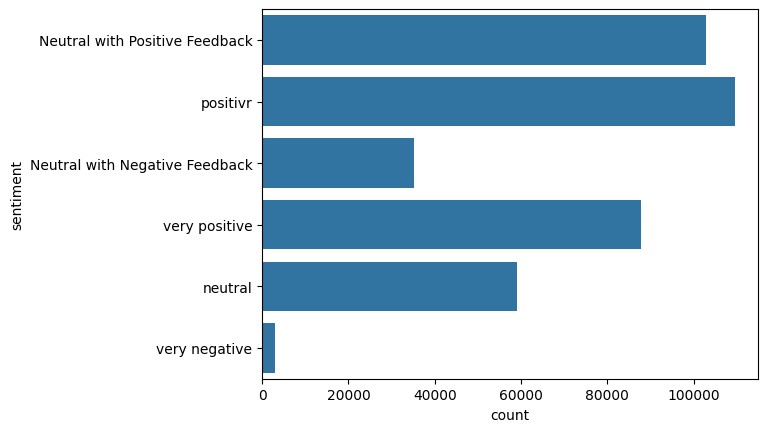

In [9]:
sns.countplot(df['sentiment'])

In [10]:
df.groupby('sentiment').agg({'Rating':'mean', 'Price':'mean', 'Review Length':'mean', 'Review Votes':'mean'})

,Rating,Price,Review Length,Review Votes
sentiment,,,,
Neutral with Negative Feedback,2.014282,204.908302,269.646683,2.102582
Neutral with Positive Feedback,3.533593,219.019410,501.105676,3.152318
neutral,3.412586,221.626983,55.635988,0.708595
positivr,4.519622,241.010565,164.556024,1.105002
very negative,1.279094,214.898057,83.761071,1.486950
very positive,4.334370,256.841391,49.546879,0.539217


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


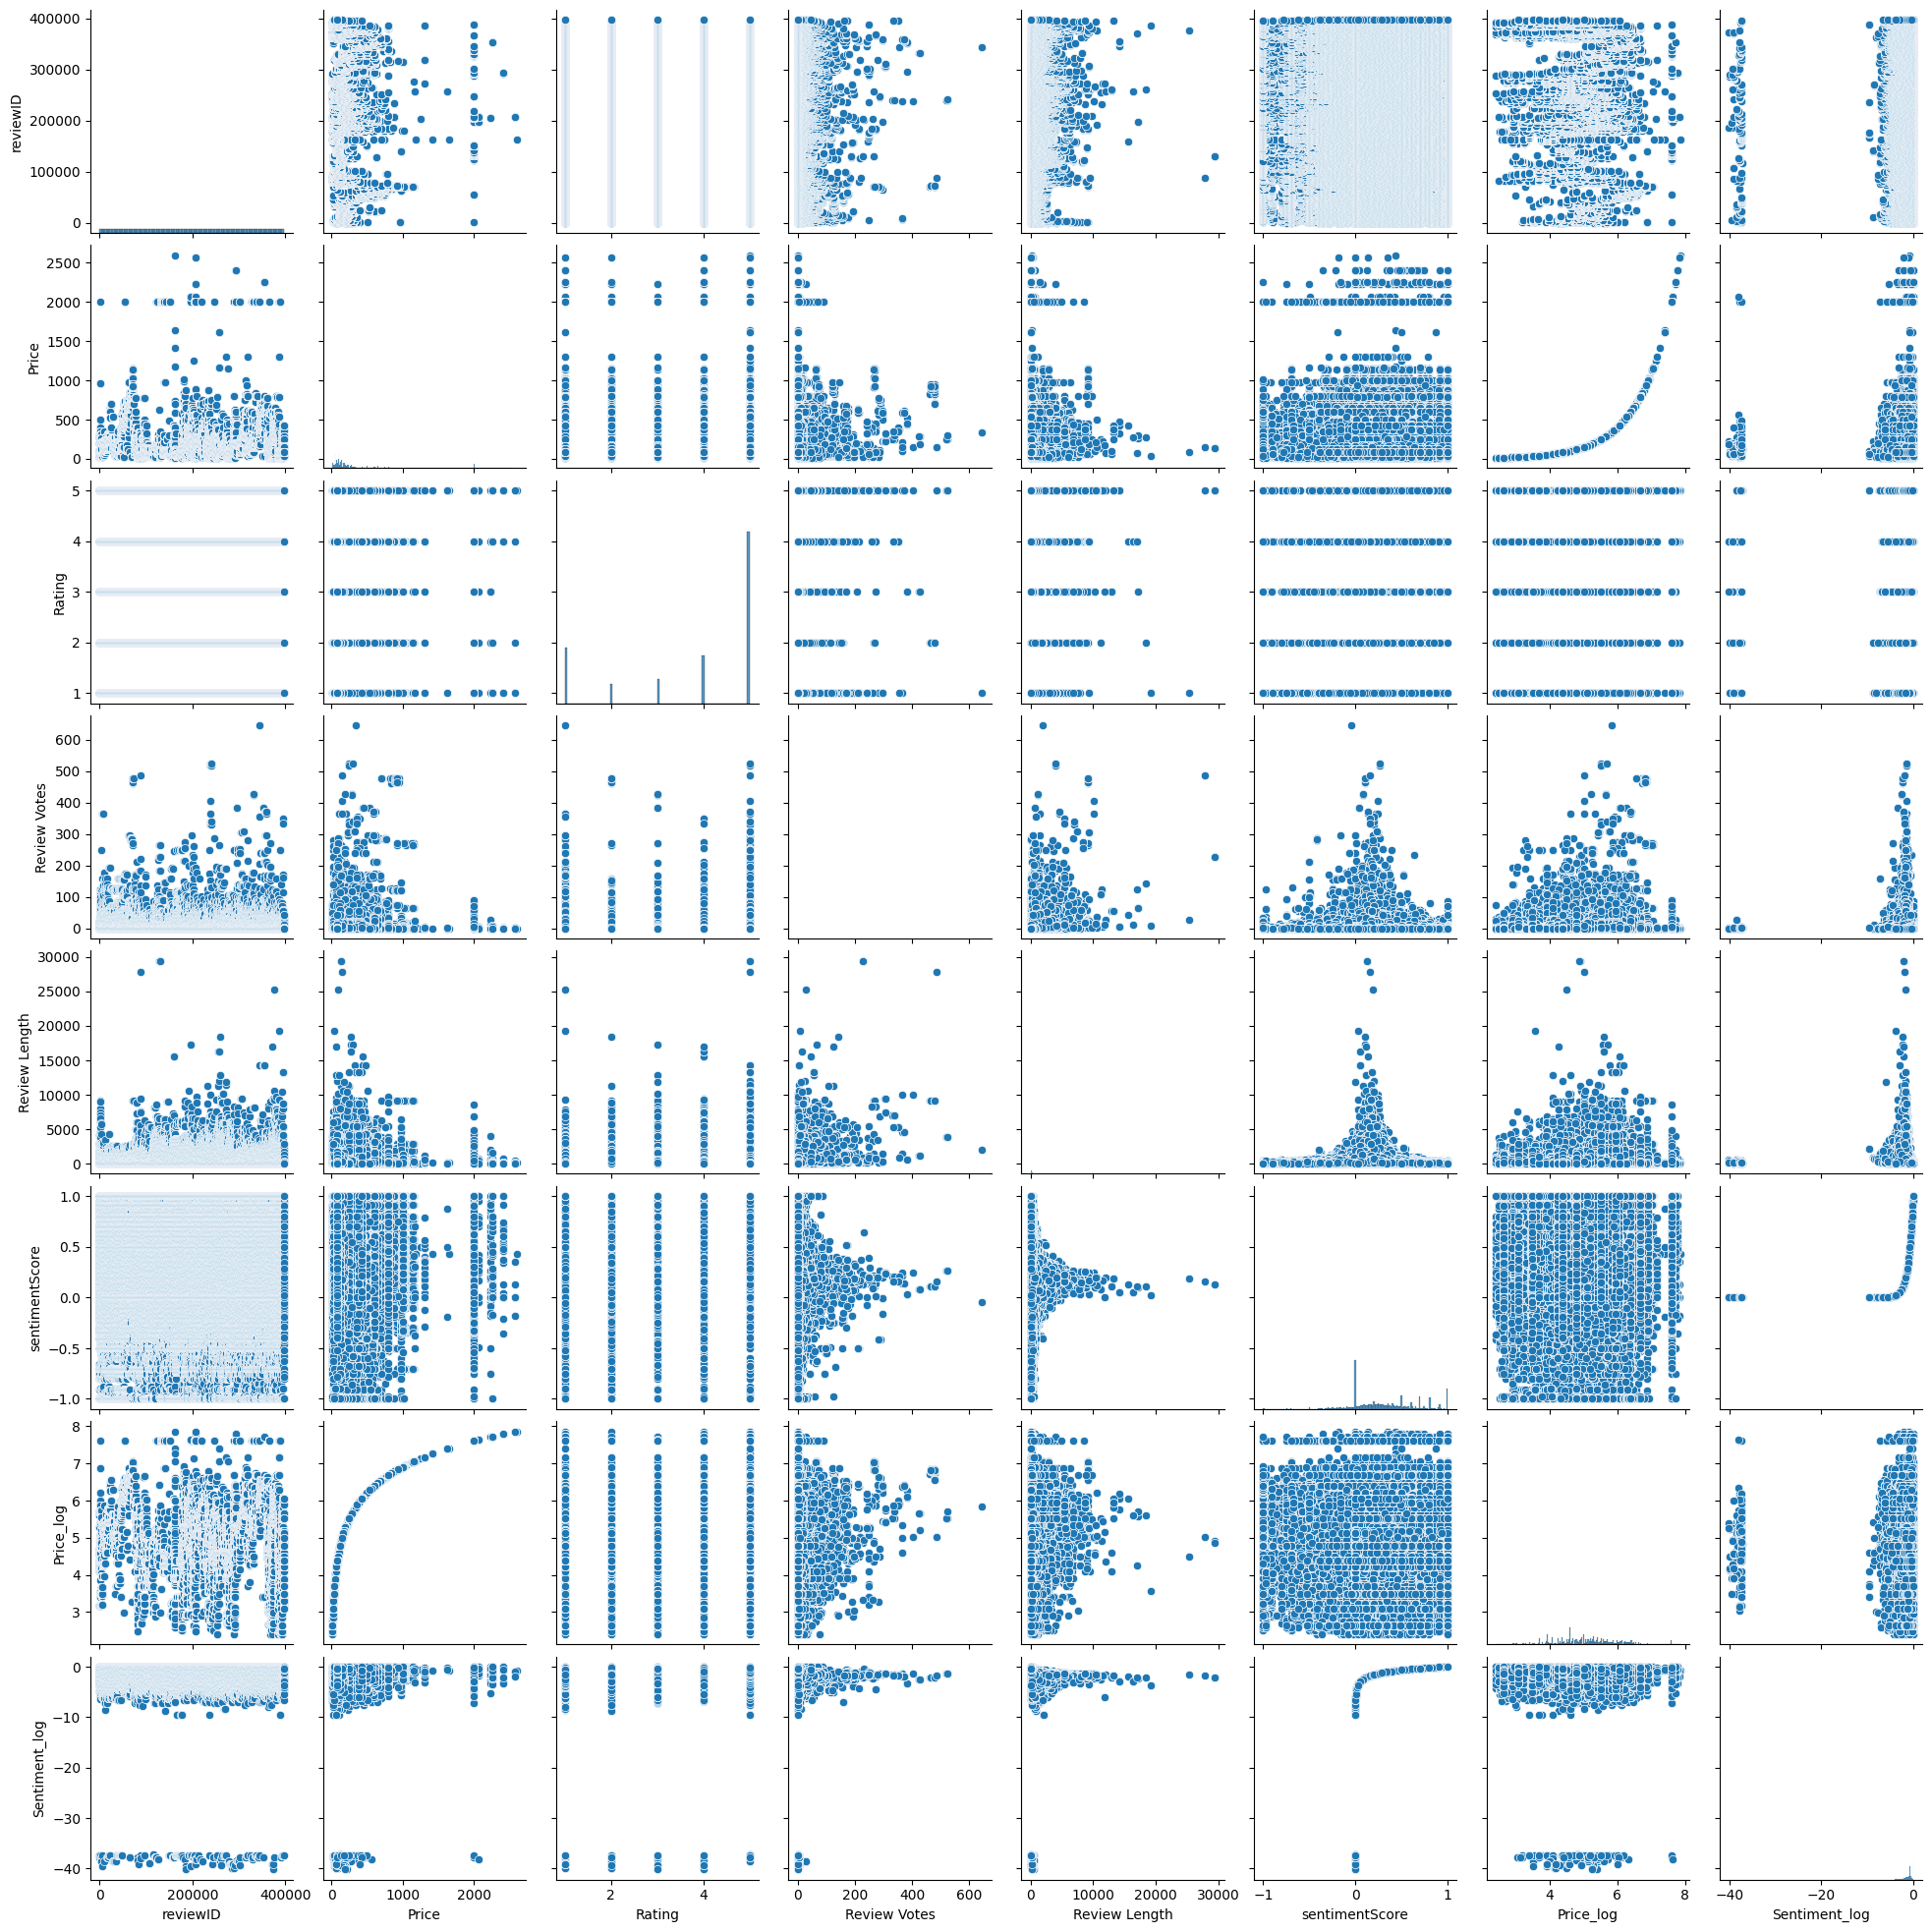

In [11]:
df['Price_log'] = np.log(df['Price'])
df['Sentiment_log'] = np.log(df['sentimentScore'])

sns.pairplot(data=df)

## Emotion Analysis

# Negative

In [12]:
df_negative = df[df["sentiment"] == "negative"]

df_negative.head()

,reviewID,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length,sentimentScore,sentiment,Price_log,Sentiment_log


In [13]:
df_negative['emotion'] = df_negative['Reviews'].apply(lambda x: te.get_emotion(x))

df_negative['emotion']

Series([], Name: emotion, dtype: object)

# Positive

In [14]:
df_positive = df[df["sentiment"] == "positive"]

In [15]:
len(df_positive)

0

In [16]:
df_veryNegative = df[df["sentiment"] == "very negative"]

In [17]:
df_NeutralNegative = df[df["sentiment"] == "Neutral with Negative Feedback"]

In [18]:
df_neutral = df[df["sentiment"] == "neutral"]

In [19]:
df_NeutralPositive = df[df["sentiment"] == "Neutral with Positive Feedback"]

# very negative


In [20]:
df_veryNegative['emotion'] = df_veryNegative['Reviews'].apply(lambda x: te.get_emotion(x))

<ipython-input-20-ddf3edcc74f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_veryNegative['emotion'] = df_veryNegative['Reviews'].apply(lambda x: te.get_emotion(x))


In [21]:
df_veryNegative.head()

,reviewID,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,Review Length,sentimentScore,sentiment,Price_log,Sentiment_log,emotion
43,43,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.0,2,It came with arabian keyboard :(,0.0,32.0,-0.75,very negative,5.700444,NaN,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
71,71,"""Nokia Asha 302 Unlocked GSM Phone with 3.2MP ...",Nokia,299.0,1,"Hola, compramos dos teléfonos y vienieron tota...",2.0,267.0,-0.75,very negative,5.700444,NaN,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
323,323,"4 Inch Touch Screen Cell Phone Unlocked, Andro...",4,23.9,1,Horrible horrible phone no reception keeps dow...,1.0,73.0,-1.00,very negative,3.173878,NaN,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
352,352,"4 Inch Touch Screen Cell Phone Unlocked, Andro...",4,23.9,1,very bad,0.0,8.0,-0.91,very negative,3.173878,NaN,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."
355,355,"4 Inch Touch Screen Cell Phone Unlocked, Andro...",4,23.9,1,I didn't like this phone. It is a horrible phone,0.0,48.0,-1.00,very negative,3.173878,NaN,"{'Happy': 0.0, 'Angry': 0.5, 'Surprise': 0.0, ..."
